In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/EIP3.0')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#https://github.com/qubvel/classification_models

# data augumentation
# https://github.com/PrzemekPobrotyn/CIFAR-10-transfer-learning/blob/master/report.ipynb

# https://github.com/priya-dwivedi/Deep-Learning/blob/master/resnet_keras/Residual_Network_Keras.ipynb

In [2]:
!pip install image-classifiers

     |████████████████████████████████| 81kB 3.8MB/s 


In [3]:
!pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-kkbb84f7
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-kkbb84f7
  Running command git submodule update --init --recursive -q
  Stored in directory: /tmp/pip-ephem-wheel-cache-ge145l4a/wheels/de/2b/fd/29a6d33edb8c28bc7d94e95ea1d39c9a218ac500a3cfb1b197
Successfully built image-classifiers


In [0]:
!ls

1_display_misclassify_images.ipynb  my_model_weights_20epochs_val_84.h5
2_misclassifiers.ipynb		    saved_models


In [0]:
from __future__ import print_function
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
import os
import keras
from keras.datasets import cifar10
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Concatenate
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras import regularizers

import keras.backend as K
from keras.regularizers import l2
import numpy as np

In [0]:
from classification_models.resnet import ResNet18, preprocess_input

model = ResNet18((224, 224, 3), weights='imagenet')

W0709 04:32:01.167634 139906368067456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0709 04:32:01.220742 139906368067456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0709 04:32:01.221844 139906368067456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0709 04:32:01.227066 139906368067456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0709 04:32:01.229676 139906

46981120/46977688 [==============================] - 2s 0us/step


In [0]:
# import numpy as np
# from skimage.io import imread
# from skimage.transform import resize
# from keras.applications.imagenet_utils import decode_predictions

# from classification_models.resnet import ResNet18, preprocess_input

# # read and prepare image
# x = imread('./imgs/tests/seagull.jpg')
# x = resize(x, (224, 224)) * 255    # cast back to 0-255 range
# x = preprocess_input(x)
# x = np.expand_dims(x, 0)

# # load model
# model = ResNet18(input_shape=(224,224,3), weights='imagenet', classes=1000)

# # processing image
# y = model.predict(x)

# # result
# print(decode_predictions(y))

In [0]:
import keras
from classification_models.resnet import ResNet18, preprocess_input


In [0]:
from keras.datasets import cifar10
# Load CIFAR10 Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img_height, img_width, channel = x_train.shape[1],x_train.shape[2],x_train.shape[3]
print ('0. Each Image height and width',img_height, img_width, channel)

print ("1. ",x_train.shape, x_train[0].shape, y_train.shape, x_test.shape, y_test.shape)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# convert to one hot encoing
num_classes= 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print ("2. ", x_train.shape, x_train[0].shape, y_train.shape, x_test.shape, y_test.shape)

if K.image_data_format() == "channels_first":
  n_channels = x_train.shape[1]
else:
  n_channels = x_train.shape[-1]
  
# Normalisation
x = np.vstack((x_train, x_test))
# 2 cases depending on the image ordering
if K.image_data_format() == "channels_first":
        for i in range(n_channels):
            mean = np.mean(x[:, i, :, :])
            std = np.std(X[:, i, :, :])
            x_train[:, i, :, :] = (x_train[:, i, :, :] - mean) / std
            x_test[:, i, :, :] = (x_test[:, i, :, :] - mean) / std
elif K.image_data_format() == "channels_last":
        for i in range(n_channels):
            mean = np.mean(x[:, :, :, i])
            std = np.std(x[:, :, :, i])
            x_train[:, :, :, i] = (x_train[:, :, :, i] - mean) / std
            x_test[:, :, :, i] = (x_test[:, :, :, i] - mean) / std
print ("3. ",x_train.shape, x_train[0].shape, y_train.shape, x_test.shape, y_test.shape)



0. Each Image height and width 32 32 3
1.  (50000, 32, 32, 3) (32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
2.  (50000, 32, 32, 3) (32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)
3.  (50000, 32, 32, 3) (32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


In [0]:
x_train =preprocess_input(x_train)
print ("3. ",x_train.shape, x_train[0].shape, y_train.shape, x_test.shape, y_test.shape)

3.  (50000, 32, 32, 3) (32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


In [0]:
from classification_models import Classifiers

classifier, preprocess_input = Classifiers.get('resnet18')
model = classifier((224, 224, 3), weights='imagenet')

In [0]:
for i,layer in enumerate(model.layers):
  print(i,layer.name, layer.trainable)

0 data False
1 bn_data True
2 zero_padding2d_19 True
3 conv0 True
4 bn0 True
5 relu0 True
6 zero_padding2d_20 True
7 pooling0 True
8 stage1_unit1_bn1 True
9 stage1_unit1_relu1 True
10 zero_padding2d_21 True
11 stage1_unit1_conv1 True
12 stage1_unit1_bn2 True
13 stage1_unit1_relu2 True
14 zero_padding2d_22 True
15 stage1_unit1_conv2 True
16 stage1_unit1_sc True
17 add_9 True
18 stage1_unit2_bn1 True
19 stage1_unit2_relu1 True
20 zero_padding2d_23 True
21 stage1_unit2_conv1 True
22 stage1_unit2_bn2 True
23 stage1_unit2_relu2 True
24 zero_padding2d_24 True
25 stage1_unit2_conv2 True
26 add_10 True
27 stage2_unit1_bn1 True
28 stage2_unit1_relu1 True
29 zero_padding2d_25 True
30 stage2_unit1_conv1 True
31 stage2_unit1_bn2 True
32 stage2_unit1_relu2 True
33 zero_padding2d_26 True
34 stage2_unit1_conv2 True
35 stage2_unit1_sc True
36 add_11 True
37 stage2_unit2_bn1 True
38 stage2_unit2_relu1 True
39 zero_padding2d_27 True
40 stage2_unit2_conv1 True
41 stage2_unit2_bn2 True
42 stage2_unit2_rel

In [0]:
for i,layer in enumerate(model.layers):
  layer.trainable = False
  print(i,layer.name, layer.trainable)

0 data False
1 bn_data False
2 zero_padding2d_19 False
3 conv0 False
4 bn0 False
5 relu0 False
6 zero_padding2d_20 False
7 pooling0 False
8 stage1_unit1_bn1 False
9 stage1_unit1_relu1 False
10 zero_padding2d_21 False
11 stage1_unit1_conv1 False
12 stage1_unit1_bn2 False
13 stage1_unit1_relu2 False
14 zero_padding2d_22 False
15 stage1_unit1_conv2 False
16 stage1_unit1_sc False
17 add_9 False
18 stage1_unit2_bn1 False
19 stage1_unit2_relu1 False
20 zero_padding2d_23 False
21 stage1_unit2_conv1 False
22 stage1_unit2_bn2 False
23 stage1_unit2_relu2 False
24 zero_padding2d_24 False
25 stage1_unit2_conv2 False
26 add_10 False
27 stage2_unit1_bn1 False
28 stage2_unit1_relu1 False
29 zero_padding2d_25 False
30 stage2_unit1_conv1 False
31 stage2_unit1_bn2 False
32 stage2_unit1_relu2 False
33 zero_padding2d_26 False
34 stage2_unit1_conv2 False
35 stage2_unit1_sc False
36 add_11 False
37 stage2_unit2_bn1 False
38 stage2_unit2_relu1 False
39 zero_padding2d_27 False
40 stage2_unit2_conv1 False
41 s

In [0]:
n_classes = 10
# build model
base_model = ResNet18(input_shape=(32,32,3), weights='imagenet', include_top=False)
x = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation='softmax')(x)
model = keras.models.Model(inputs=[base_model.input], outputs=[output])

model.summary()
for i,layer in enumerate(model.layers):
  print(i,layer.name)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_55 (ZeroPadding2 (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_55[0][0]          
__________________________________________________________________________________________________
bn0 (Batch

In [0]:
# model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 100
batch_size = 32
datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # epsilon for ZCA whitening
        zca_epsilon=1e-06,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # set range for random shear
        shear_range=0.,
        # set range for random zoom
        zoom_range=0.,
        # set range for random channel shifts
        channel_shift_range=0.,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        # value used for fill_mode = "constant"
        cval=0.,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False,
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)
datagen.fit(x_train)


# Model name, depth and version
model_type = 'resnet18'
# Prepare model model saving directory.
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar10_%s_model.{epoch:03d}.h5' % model_type
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)


# Prepare callbacks for model saving and for learning rate adjustment.
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)
callbacks = [checkpoint]

# Fit the model on the batches generated by datagen.flow().
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch = len(x_train)/batch_size,
                        validation_data=(x_test, y_test),
                        epochs=epochs, verbose=1, workers=4)

In [0]:
# model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 50
batch_size = 32
rotation_range=20
width_shift_range=0.1
height_shift_range=0.1
shear_range=0.1
zoom_range=0.1
horizontal_flip=True

datagen = ImageDataGenerator(
        rotation_range=rotation_range,
        width_shift_range=width_shift_range,
        height_shift_range=height_shift_range,
        shear_range=shear_range,
        zoom_range=zoom_range,
        horizontal_flip=horizontal_flip,
    )
datagen.fit(x_train)


# Model name, depth and version
model_type = 'resnet18'
# Prepare model model saving directory.
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar10_%s_model.{epoch:03d}.h5' % model_type
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)


# Prepare callbacks for model saving and for learning rate adjustment.
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)
callbacks = [checkpoint]

# Fit the model on the batches generated by datagen.flow().
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch = len(x_train)/batch_size,
                        validation_data=(x_test, y_test),
                        epochs=epochs, verbose=1, workers=4)

Epoch 1/50
1563/1562 [==============================] - 118s 75ms/step - loss: 0.7490 - acc: 0.7399 - val_loss: 0.6798 - val_acc: 0.7656
Epoch 2/50
1563/1562 [==============================] - 114s 73ms/step - loss: 0.6880 - acc: 0.7595 - val_loss: 0.5854 - val_acc: 0.7981
Epoch 3/50
1563/1562 [==============================] - 114s 73ms/step - loss: 0.6456 - acc: 0.7746 - val_loss: 0.5565 - val_acc: 0.8042
Epoch 4/50
1563/1562 [==============================] - 114s 73ms/step - loss: 0.6166 - acc: 0.7840 - val_loss: 0.5383 - val_acc: 0.8108
Epoch 5/50
1563/1562 [==============================] - 114s 73ms/step - loss: 0.5850 - acc: 0.7970 - val_loss: 0.5373 - val_acc: 0.8115
Epoch 6/50
1563/1562 [==============================] - 114s 73ms/step - loss: 0.5642 - acc: 0.8017 - val_loss: 0.5231 - val_acc: 0.8216
Epoch 7/50
1563/1562 [==============================] - 115s 73ms/step - loss: 0.5369 - acc: 0.8125 - val_loss: 0.5416 - val_acc: 0.8112
Epoch 8/50
1563/1562 [===================

In [0]:

model.save_weights('my_model_weights_20epochs_val_84.h5')

## Misclassifying the Images

In [3]:
from __future__ import print_function
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
import os
import keras
from keras.datasets import cifar10
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Concatenate
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras import regularizers

import keras.backend as K
from keras.regularizers import l2
import numpy as np

import keras
from classification_models.resnet import ResNet18, preprocess_input
from keras.datasets import cifar10
# Load CIFAR10 Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img_height, img_width, channel = x_train.shape[1],x_train.shape[2],x_train.shape[3]
print ('0. Each Image height and width',img_height, img_width, channel)

print ("1. ",x_train.shape, x_train[0].shape, y_train.shape, x_test.shape, y_test.shape)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# convert to one hot encoing
num_classes= 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print ("2. ", x_train.shape, x_train[0].shape, y_train.shape, x_test.shape, y_test.shape)

if K.image_data_format() == "channels_first":
  n_channels = x_train.shape[1]
else:
  n_channels = x_train.shape[-1]
  
# Normalisation
x = np.vstack((x_train, x_test))
# 2 cases depending on the image ordering
if K.image_data_format() == "channels_first":
        for i in range(n_channels):
            mean = np.mean(x[:, i, :, :])
            std = np.std(X[:, i, :, :])
            x_train[:, i, :, :] = (x_train[:, i, :, :] - mean) / std
            x_test[:, i, :, :] = (x_test[:, i, :, :] - mean) / std
elif K.image_data_format() == "channels_last":
        for i in range(n_channels):
            mean = np.mean(x[:, :, :, i])
            std = np.std(x[:, :, :, i])
            x_train[:, :, :, i] = (x_train[:, :, :, i] - mean) / std
            x_test[:, :, :, i] = (x_test[:, :, :, i] - mean) / std
print ("3. ",x_train.shape, x_train[0].shape, y_train.shape, x_test.shape, y_test.shape)

Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step
0. Each Image height and width 32 32 3
1.  (50000, 32, 32, 3) (32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
2.  (50000, 32, 32, 3) (32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)
3.  (50000, 32, 32, 3) (32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


In [4]:
x_train =preprocess_input(x_train)
print ("3. ",x_train.shape, x_train[0].shape, y_train.shape, x_test.shape, y_test.shape)

from classification_models import Classifiers
classifier, preprocess_input = Classifiers.get('resnet18')
model = classifier((224, 224, 3), weights='imagenet')

n_classes = 10
# build model
base_model = ResNet18(input_shape=(32,32,3), weights='imagenet', include_top=False)
x = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation='softmax')(x)
model = keras.models.Model(inputs=[base_model.input], outputs=[output])

model.summary()
# for i,layer in enumerate(model.layers):
#   print(i,layer.name)
  

# model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])



W0712 03:04:51.839562 139803922708352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 03:04:51.902084 139803922708352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 03:04:51.903350 139803922708352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0712 03:04:51.906681 139803922708352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0712 03:04:51.911099 139803

3.  (50000, 32, 32, 3) (32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


W0712 03:04:54.897054 139803922708352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0712 03:04:55.102298 139803922708352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



46981120/46977688 [==============================] - 1s 0us/step
A local file was found, but it seems to be incomplete or outdated because the md5 file hash does not match the original value of 318e3ac0cd98d51e917526c9f62f0b50 so we will re-download the data.
44924928/44920640 [==============================] - 2s 0us/step


W0712 03:05:05.756728 139803922708352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_19 (ZeroPadding2 (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_19[0][0]          
__________________________________________________________________________________________________
bn0 (Batch

### Loading Weights

In [0]:
model.load_weights('my_model_weights_20epochs_val_84.h5')

### Logic for displaying Classnames of Predicted and Actual

In [6]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
from skimage.transform import resize
def preprocess(x):
    x = resize(x, (32,32), mode='constant') * 255
    x = preprocess_input(x)
    if x.ndim == 3:
        x = np.expand_dims(x, 0)
    return x
#Logic for Predicted Classes
# prepare image
x_test_preprocess = preprocess(x_test[1])
y_pred_test = model.predict(x_test_preprocess)
print('Predicted Values  :', y_pred_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
print('Index of maximum value from predicted classes  :', y_pred_test_classes[0])
#get the predicted class
predicted_classname = cifar10_classes[y_pred_test_classes[0]]
print('predicted_classname :',predicted_classname)

#Logic for Actual Classes
#get the actual index name
index_num = np.where(y_test[1] == 1)
index_num = np.argmax(y_test[1])

print("Index from actual classes :", index_num)
actual_classname = cifar10_classes[index_num]
print('acutal_classname :',actual_classname)




Predicted Values  : [[1.0113331e-21 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]]
Index of maximum value from predicted classes  : 8
predicted_classname : ship
Index from actual classes : 8
acutal_classname : ship


### We will predict the probabilities of all the images in our test set

In [7]:
from skimage.transform import resize
def preprocess(x):
    x = resize(x, (32,32), mode='constant') * 255
    x = preprocess_input(x)
    if x.ndim == 3:
        x = np.expand_dims(x, 0)
    return x
predicted_classnames = []
for i in range(len(x_test)):
  x_test_preprocess = preprocess(x_test[i])
  y_pred = model.predict(x_test_preprocess)
  #print('Predicted Values  :', y_pred)
  y_pred_maxvalue_index = np.argmax(y_pred, axis=1)
  #print('Index of maximum value from predicted classes  :', y_pred_maxvalue_index[0])
  #get the predicted class
  predicted_classname = cifar10_classes[y_pred_maxvalue_index[0]]
  print('Predicted_classnames:',predicted_classname)
  predicted_classnames.append(predicted_classname)
  

Predicted_classnames: airplane
Predicted_classnames: ship
Predicted_classnames: airplane
Predicted_classnames: airplane
Predicted_classnames: airplane
Predicted_classnames: horse
Predicted_classnames: horse
Predicted_classnames: airplane
Predicted_classnames: airplane
Predicted_classnames: airplane
Predicted_classnames: airplane
Predicted_classnames: horse
Predicted_classnames: airplane
Predicted_classnames: horse
Predicted_classnames: airplane
Predicted_classnames: ship
Predicted_classnames: horse
Predicted_classnames: horse
Predicted_classnames: airplane
Predicted_classnames: airplane
Predicted_classnames: airplane
Predicted_classnames: airplane
Predicted_classnames: airplane
Predicted_classnames: airplane
Predicted_classnames: airplane
Predicted_classnames: airplane
Predicted_classnames: horse
Predicted_classnames: airplane
Predicted_classnames: horse
Predicted_classnames: airplane
Predicted_classnames: airplane
Predicted_classnames: airplane
Predicted_classnames: horse
Predicted_cl

### Generate Actual labels fo the test dataset

In [8]:
from skimage.transform import resize
def preprocess(x):
    x = resize(x, (32,32), mode='constant') * 255
    x = preprocess_input(x)
    if x.ndim == 3:
        x = np.expand_dims(x, 0)
    return x
actual_classnames = []
for i in range(len(x_test)):
  #Logic for Actual Classes
  #get the actual index name
  index_num = np.argmax(y_test[i])
#  print("Index from actual classes :", index_num)
  actual_classname = cifar10_classes[index_num]
  print('acutal_classname :',actual_classname)
  actual_classnames.append(actual_classname)

acutal_classname : cat
acutal_classname : ship
acutal_classname : ship
acutal_classname : airplane
acutal_classname : frog
acutal_classname : frog
acutal_classname : automobile
acutal_classname : frog
acutal_classname : cat
acutal_classname : automobile
acutal_classname : airplane
acutal_classname : truck
acutal_classname : dog
acutal_classname : horse
acutal_classname : truck
acutal_classname : ship
acutal_classname : dog
acutal_classname : horse
acutal_classname : ship
acutal_classname : frog
acutal_classname : horse
acutal_classname : airplane
acutal_classname : deer
acutal_classname : truck
acutal_classname : dog
acutal_classname : bird
acutal_classname : deer
acutal_classname : airplane
acutal_classname : truck
acutal_classname : frog
acutal_classname : frog
acutal_classname : dog
acutal_classname : deer
acutal_classname : dog
acutal_classname : truck
acutal_classname : bird
acutal_classname : deer
acutal_classname : automobile
acutal_classname : truck
acutal_classname : dog
acuta

### Run in the loop to find out 50 misclassified Images


In [9]:
len(predicted_classnames)

10000

In [0]:
# count = 0
# Image_list = []
# for n in range(0, 500):
#   print(n)
#   random_index = np.random.randint(0, len(y_test))
#   pred_label = predicted_classnames[random_index]
#   true_label = actual_classnames[random_index]
#   if pred_label != true_label:
#     count = count + 1
#     if count > 50:
#       break
    
  
  

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
W0712 03:55:05.469557 139803922708352 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0712 03:55:05.487949 139803922708352 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0712 03:55:05.523322 139803922708352 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0712 03:55:05.543528 139803922708352 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0712 03:55:05.564755 139803922708352 image.py:648] Cli

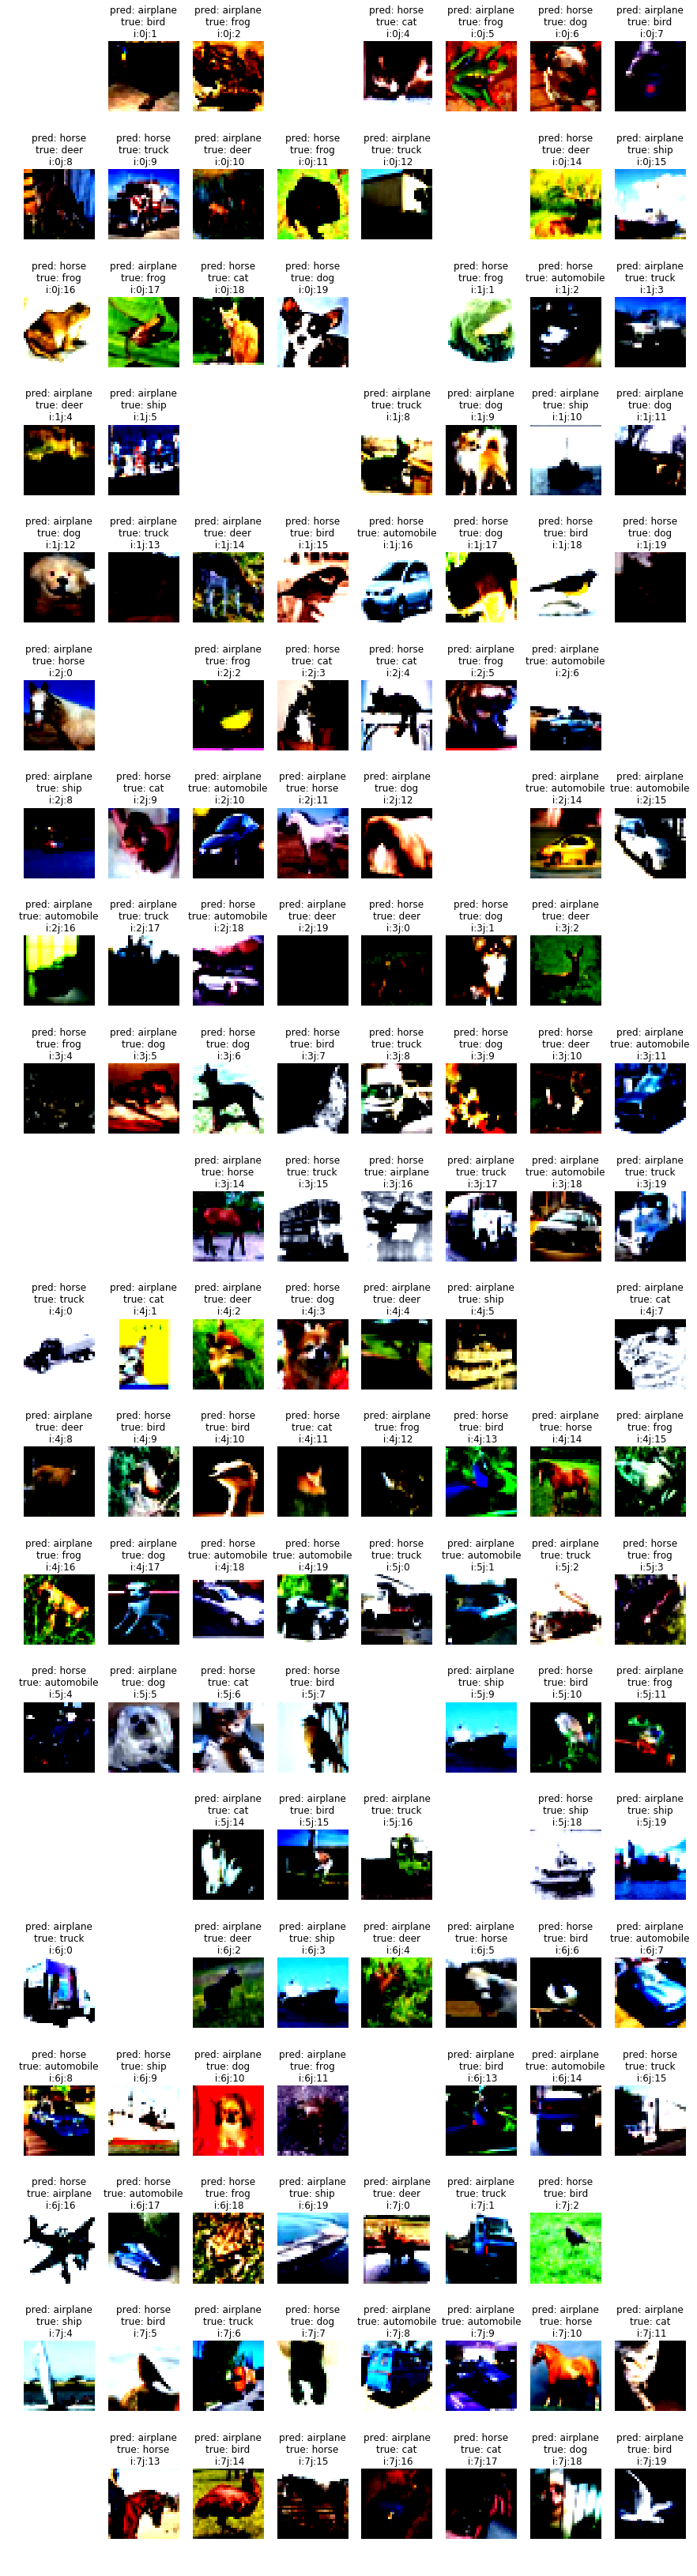

In [26]:
import matplotlib.pyplot as plt
cols = 8
rows = 20
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
#         ax.imshow(x_test[random_index, :])
        pred_label = predicted_classnames[random_index]
        true_label = actual_classnames[random_index]
        if pred_label != true_label:
#           ax = fig.add_subplot(rows, cols, i * rows + j + 1)
#           ax.grid('off')
#           ax.axis('off')
          ax.imshow(x_test[random_index, :])
          ax.set_title("pred: {}\ntrue: {}\n i:{}j:{}".format(pred_label, true_label, i, j))
        else:
          j = j-1
#         ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(pred_label, pred_proba, true_label))
        
          
     
plt.show()